- Importing necessary libraries

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [311]:
# Data Extraction and description

In [312]:
df = pd.read_csv('C:/Users/Pankaj Aggarwal/Decodr Projects/Case-3 Uber Analysis/Uber Request Data.csv', parse_dates=True)
df.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47


In [313]:
df.shape

(6745, 6)

In [314]:
df['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [315]:
df['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

In [316]:
df.info()
# need to convert timestamp type from object into datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [317]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [319]:
df['R_hr'], df['R_day'] = df['Request timestamp'].apply(lambda x:x.hour), df['Request timestamp'].apply(lambda x:x.day)

In [320]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,R_hr,R_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


In [321]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,R_hr,R_day
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15
6744,6753,Airport,NaN,No Cars Available,2016-07-15 23:55:03,NaT,23,15


In [322]:
df.drop('Request timestamp', axis = 1, inplace=True)

In [323]:
df.head(1)

,Request id,Pickup point,Driver id,Status,Drop timestamp,R_hr,R_day
0,619,Airport,1.0,Trip Completed,2016-11-07 13:00:00,11,7


#### 1. Lets analyze the cancelled and unavailability of cars

In [324]:
import seaborn as sns

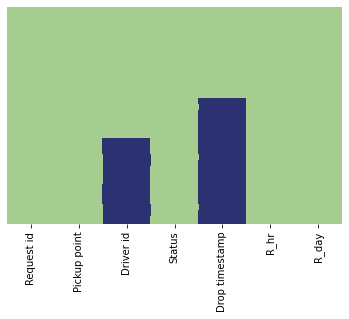

In [325]:
sns.heatmap(df.isnull(), cmap='crest', cbar=False,yticklabels=False)

1. Missing data of driver id indicates that car is not available at requested time as given in the problem statement.
2. Missing data of Drop timestamp indicates that ride was not completed either due to unavailability of car or driver has cancelled the ride as given in the problem statement.

In [329]:
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [326]:
df['Status'].value_counts(normalize=True)

Trip Completed       0.419718
No Cars Available    0.392884
Cancelled            0.187398
Name: Status, dtype: float64

- We are losing around 60% of our business due to driver cancellation or cars unavailability.

#### 2. Lets analyze how trips are not completed on the basis of pickup point

In [328]:
df['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [327]:
df['Pickup point'].value_counts(normalize=True)

City       0.519941
Airport    0.480059
Name: Pickup point, dtype: float64

- No. of requests are approximately same from both pickup points.

Text(0.5, 1.0, 'Ride Status for Pickup Points')

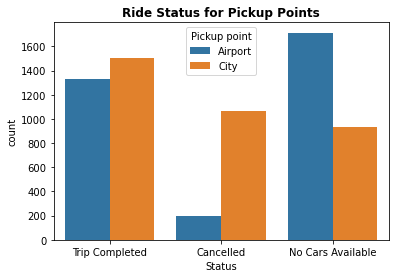

In [429]:
sns.countplot(x='Status', hue='Pickup point', data=df)
plt.title('Ride Status for Pickup Points', weight='bold')

In [330]:
df[df['Pickup point']=='City']['Status'].value_counts()

Trip Completed       1504
Cancelled            1066
No Cars Available     937
Name: Status, dtype: int64

In [265]:
df[df['Pickup point']=='City']['Status'].value_counts(normalize=True)

Trip Completed       0.428857
Cancelled            0.303964
No Cars Available    0.267180
Name: Status, dtype: float64

In [337]:
df[df['Pickup point']=='Airport']['Status'].value_counts()

No Cars Available    1713
Trip Completed       1327
Cancelled             198
Name: Status, dtype: int64

In [266]:
df[df['Pickup point']=='Airport']['Status'].value_counts(normalize=True)

No Cars Available    0.529030
Trip Completed       0.409821
Cancelled            0.061149
Name: Status, dtype: float64

1. Cancellation rate at airport are very less but cars unavailability is huge. More than 50% of time cars are unavailable.
2. Cancellation rate and cars unavailability are almost same in city. Need to look deep for city analysis.

#### 3. Lets analyze if request time affects the ride status

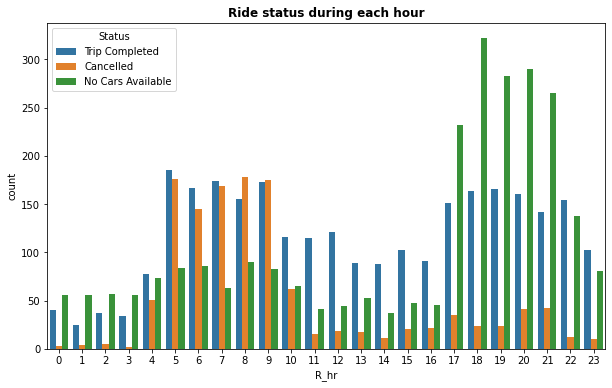

In [431]:
plt.figure(figsize=[10,6])
sns.countplot(x='R_hr', hue='Status', data=df)
plt.title('Ride status during each hour', weight='bold')
plt.show()

- Unavailability of cars is huge from 5pm to 4am, while cancelled rides are at peak from 5am to 9am.

In [338]:
a=[]

In [339]:
for i, j in df.iterrows():
    if j['R_hr']>=8 and j['R_hr']<=11:
        a.append('Morning')
    elif j['R_hr']>=4 and j['R_hr']<=7:
        a.append('Early Morning')
    elif j['R_hr']>=12 and j['R_hr']<=15:
        a.append('Noon')
    elif j['R_hr']>=16 and j['R_hr']<=19:
        a.append('Evening')
    elif j['R_hr']>=20 and j['R_hr']<=23:
        a.append('Night')
    else:
        a.append('Late Night')

In [340]:
a = pd.DataFrame(a, columns=['Daytime'])

In [341]:
df=pd.concat([df, a], axis = 1)

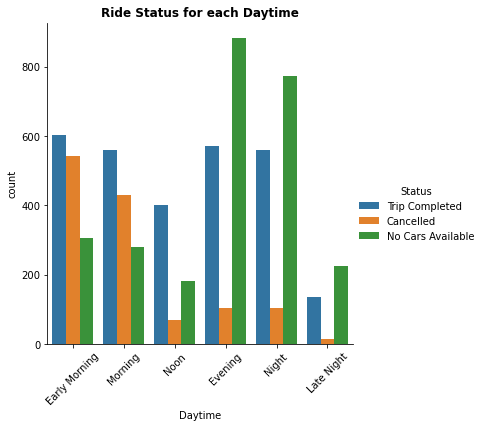

In [432]:
sns.catplot(x='Daytime',hue='Status' , data=df, kind='count', 
            order=['Early Morning','Morning','Noon','Evening','Night','Late Night'])
plt.tick_params('x', rotation=45)
plt.title('Ride Status for each Daytime', weight='bold')
plt.show()

- As we can see, cars unavailability is high during evening to late night while cancelled rides is high in morning

### Demand of rides during Evening to late Night

In [383]:
df[np.logical_or(df['Daytime']=='Evening', np.logical_or(df['Daytime']=='Night', df['Daytime']=='Late Night'))]['Status'].value_counts().sum()

3374

### Supply of rides during Evening to late Night

In [384]:
df[np.logical_or(df['Daytime']=='Evening', np.logical_or(df['Daytime']=='Night', df['Daytime']=='Late Night'))][df['Status']=='Trip Completed'].shape[0]

1268

- During this we are not able to meet almost 1/3 of the demand

### Demand of rides during Morning

In [385]:
df[np.logical_or(df['Daytime']=='Morning',df['Daytime']=='Early Morning')]['Status'].value_counts().sum()

2720

### Supply of rides during Morning

In [386]:
df[np.logical_or(df['Daytime']=='Morning',df['Daytime']=='Early Morning')][df['Status']=='Trip Completed'].shape[0]

1163

- During this we are not able to meet even 1/2 the demand.

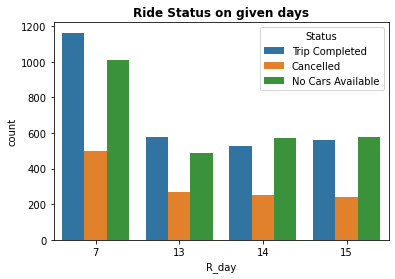

In [434]:
sns.countplot(x='R_day', hue='Status', data=df)
plt.title('Ride Status on given days', weight='bold')
plt.show()

- Almost following the same trend.

#### 4. Lets analyze how above diagram varies from pickup point

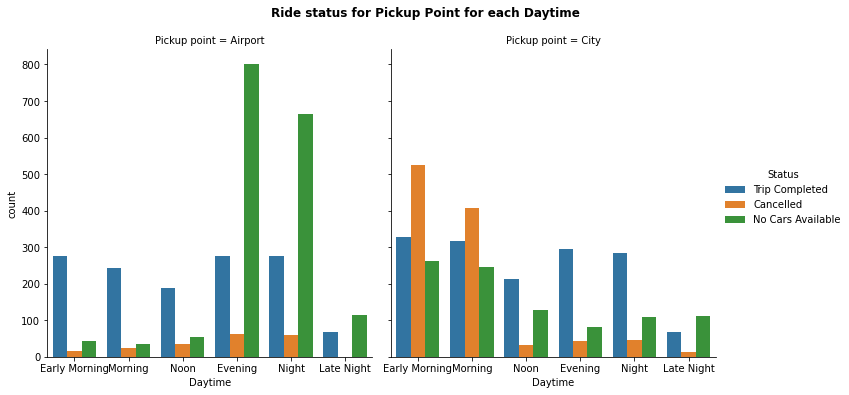

In [438]:
g = sns.catplot(x='Daytime', hue = 'Status', data=df, kind='count', col='Pickup point', 
            order=['Early Morning','Morning','Noon','Evening','Night','Late Night'])
g.fig.suptitle('Ride status for Pickup Point for each Daytime', weight='bold', y=1.05)
plt.show()

1. During Evening, Night and late night, unavailability of car is too huge at airport
2. During Morning and early morning, cancelled trips and unavailability of cars is too huge. Need to address this problem.

In [387]:
airport_data=df[df['Pickup point']=='Airport']
airport_data.head()

,Request id,Pickup point,Driver id,Status,Drop timestamp,R_hr,R_day,Daytime
0,619,Airport,1.0,Trip Completed,2016-11-07 13:00:00,11,7,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 18:47:00,17,7,Evening
3,2532,Airport,1.0,Trip Completed,2016-12-07 22:03:00,21,7,Night
5,3879,Airport,1.0,Trip Completed,2016-07-13 22:28:59,21,13,Night
6,4270,Airport,1.0,Trip Completed,2016-07-14 07:13:15,6,14,Early Morning


### Demand at airport during evening to late night

In [388]:
airport_data[np.logical_or(airport_data['Daytime']=='Evening', np.logical_or(airport_data['Daytime']=='Night', airport_data['Daytime']=='Late Night'))]['Status'].value_counts().sum()

2323

### Supply at airport during evening to late night

In [389]:
airport_data[np.logical_or(airport_data['Daytime']=='Evening', np.logical_or(airport_data['Daytime']=='Night', airport_data['Daytime']=='Late Night'))][airport_data['Status']=='Trip Completed'].shape[0]

620

- Demand supply gap is too huge. Not even meeting 1/4 at airport. Most of them due to unavailability as per the graph.

### Demand at city during morning time

In [394]:
city_data=df[df['Pickup point']=='City']
city_data.head()

,Request id,Pickup point,Driver id,Status,Drop timestamp,R_hr,R_day,Daytime
2,1807,City,1.0,Trip Completed,2016-12-07 09:58:00,9,7,Morning
4,3112,City,1.0,Trip Completed,2016-07-13 09:25:47,8,13,Morning
8,6248,City,1.0,Trip Completed,2016-07-15 18:50:51,17,15,Evening
9,267,City,2.0,Trip Completed,2016-11-07 07:25:00,6,7,Early Morning
11,1983,City,2.0,Trip Completed,2016-12-07 12:57:00,12,7,Noon


In [395]:
city_data[np.logical_or(city_data['Daytime']=='Morning',city_data['Daytime']=='Early Morning')]['Status'].value_counts().sum()

2083

### Supply at city during morning time

In [396]:
city_data[np.logical_or(city_data['Daytime']=='Morning',city_data['Daytime']=='Early Morning')][city_data['Status']=='Trip Completed'].shape[0]

643

In [401]:
city_data[np.logical_or(city_data['Daytime']=='Morning',city_data['Daytime']=='Early Morning')]['Status'].value_counts()

Cancelled            932
Trip Completed       643
No Cars Available    508
Name: Status, dtype: int64

- Not even able to meet 1/3 of demand. Most were cancelled

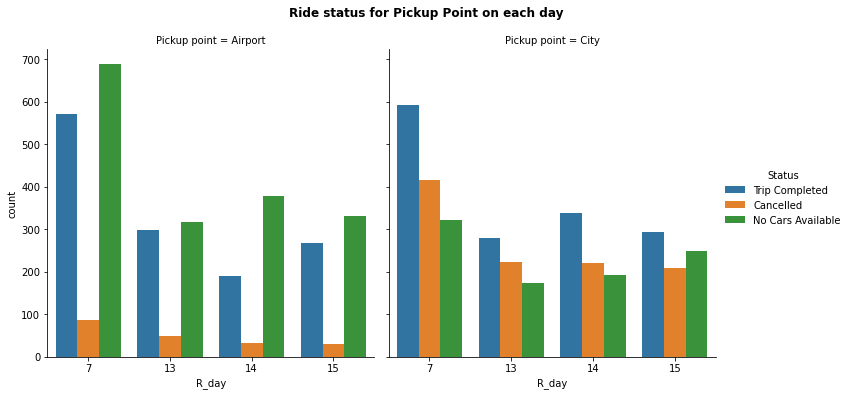

In [440]:
g=sns.catplot(x='R_day', hue = 'Status', data=df, kind='count', col='Pickup point')
g.fig.suptitle('Ride status for Pickup Point on each day', weight = 'bold', y=1.05)
plt.show()

- Again almost following the same pattern

#### 5. Lets see if there are some drivers who are cancelling rides very often

In [281]:
df.head(1)

,Request id,Pickup point,Driver id,Status,Drop timestamp,R_hr,R_day,Daytime
0,619,Airport,1.0,Trip Completed,2016-11-07 13:00:00,11,7,Morning


In [282]:
import numpy as np

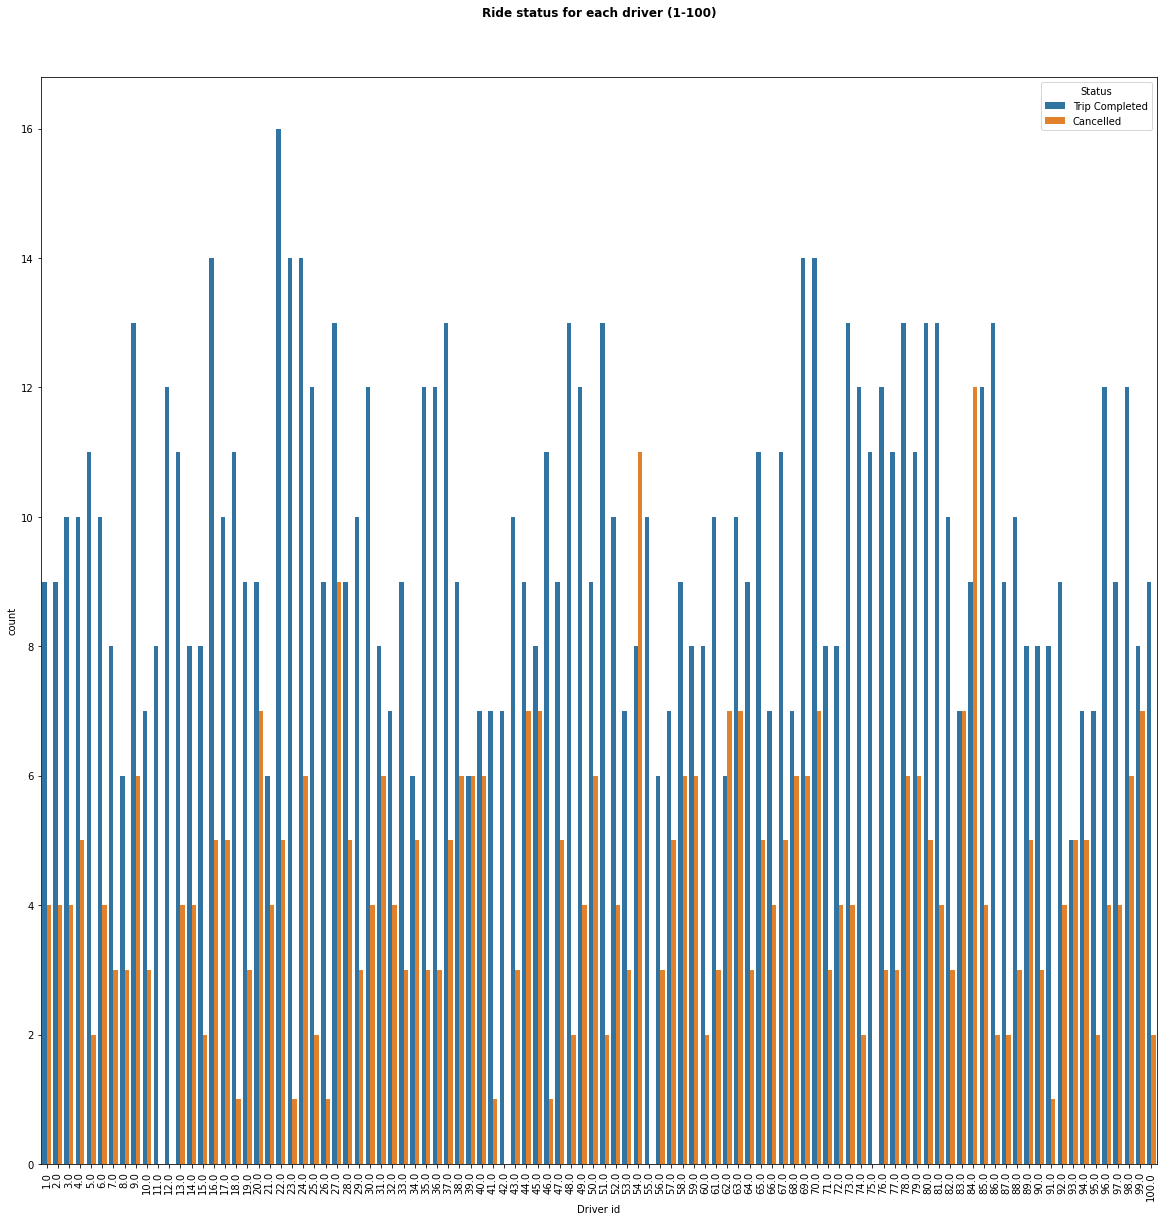

In [442]:
x = df[np.logical_and(df['Driver id']>=1, df['Driver id']<=100)]
plt.figure(figsize=[20,20])
sns.countplot(x='Driver id', hue='Status', data=x)
plt.tick_params('x', rotation=90)
plt.title('Ride status for each driver (1-100)', weight='bold', y=1.05)
plt.show()

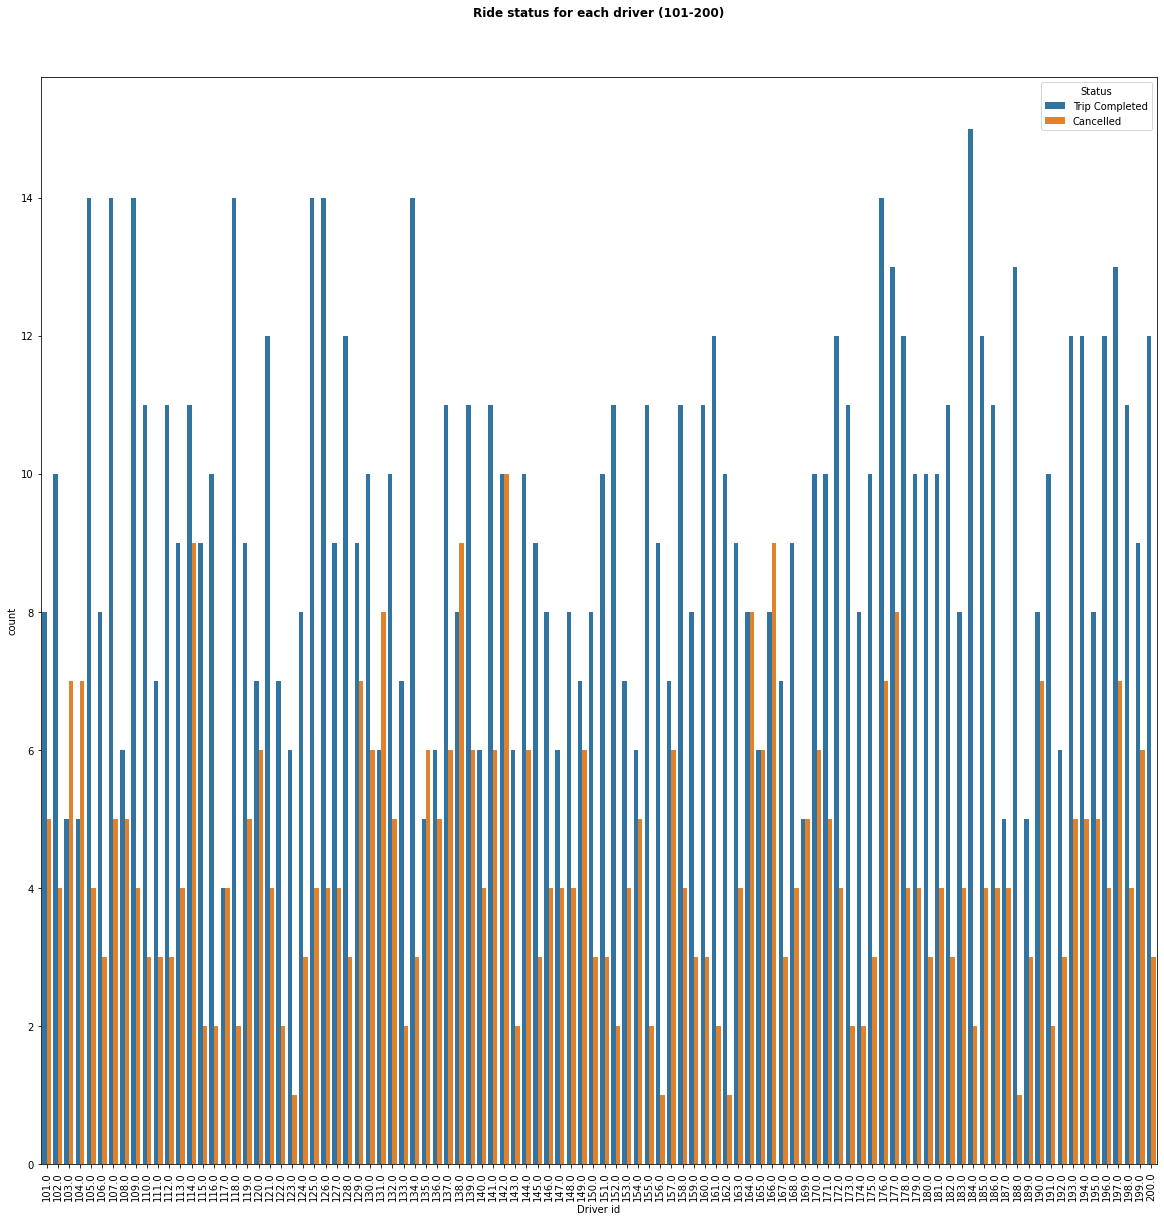

In [443]:
y = df[np.logical_and(df['Driver id']>=101, df['Driver id']<=200)]
plt.figure(figsize=[20,20])
sns.countplot(x='Driver id', hue='Status', data=y)
plt.tick_params('x', rotation=90)
plt.title('Ride status for each driver (101-200)', weight='bold', y=1.05)
plt.show()

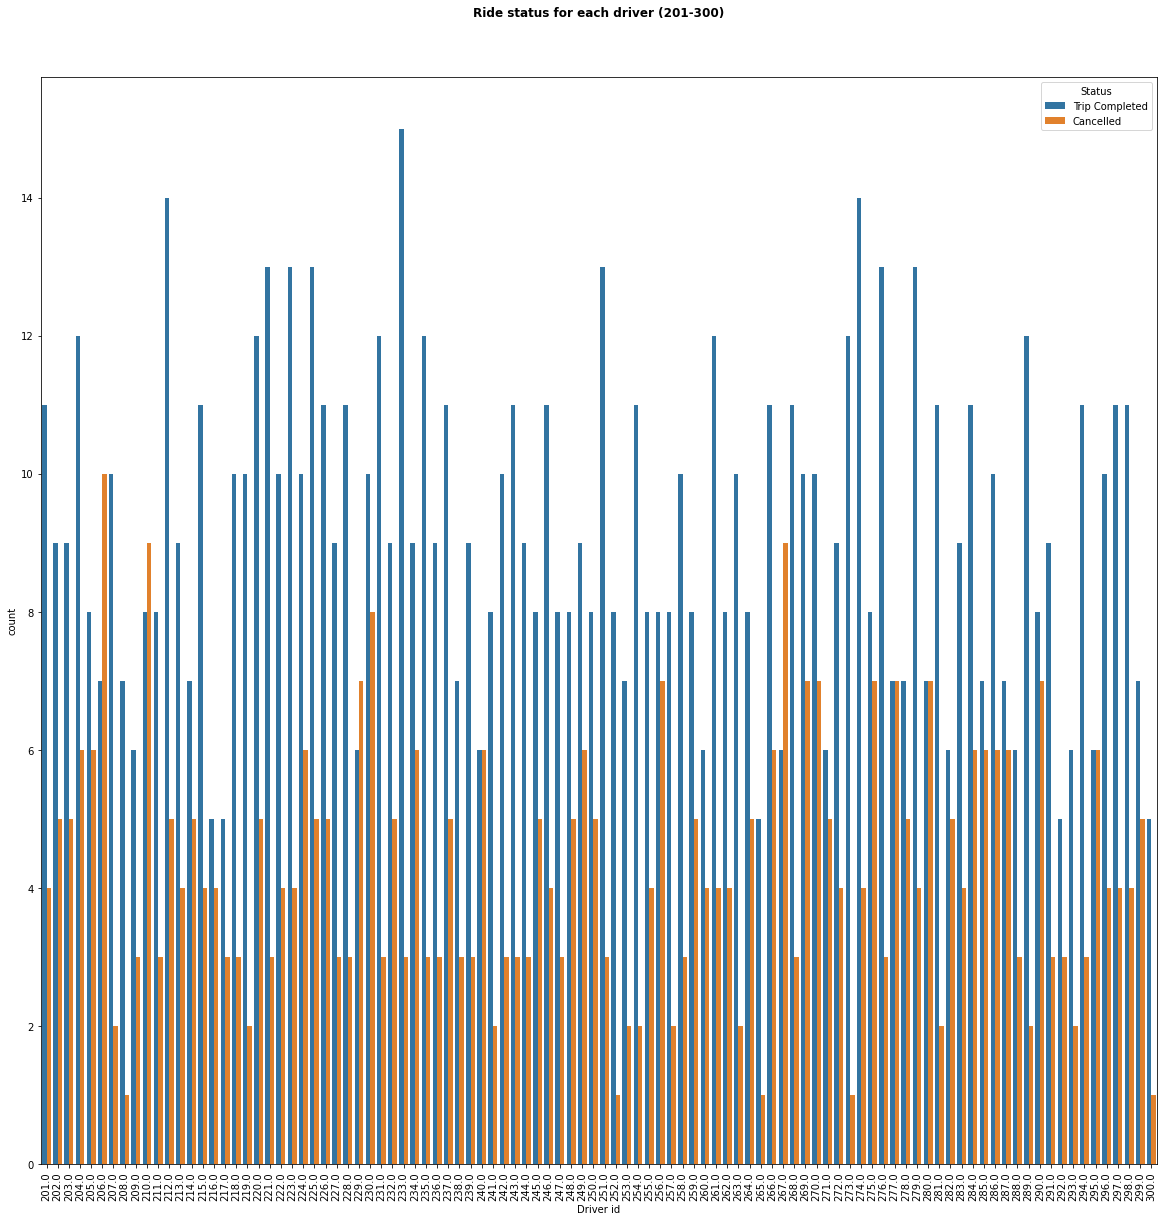

In [444]:
z = df[np.logical_and(df['Driver id']>=201, df['Driver id']<=300)]
plt.figure(figsize=[20,20])
sns.countplot(x='Driver id', hue='Status', data=z)
plt.tick_params('x', rotation=90)
plt.title('Ride status for each driver (201-300)', weight='bold', y=1.05)
plt.show()

1. As we can see there are some drivers who are cancelling rides very often

#### 6. Lets see how above diagram varies from pickup point

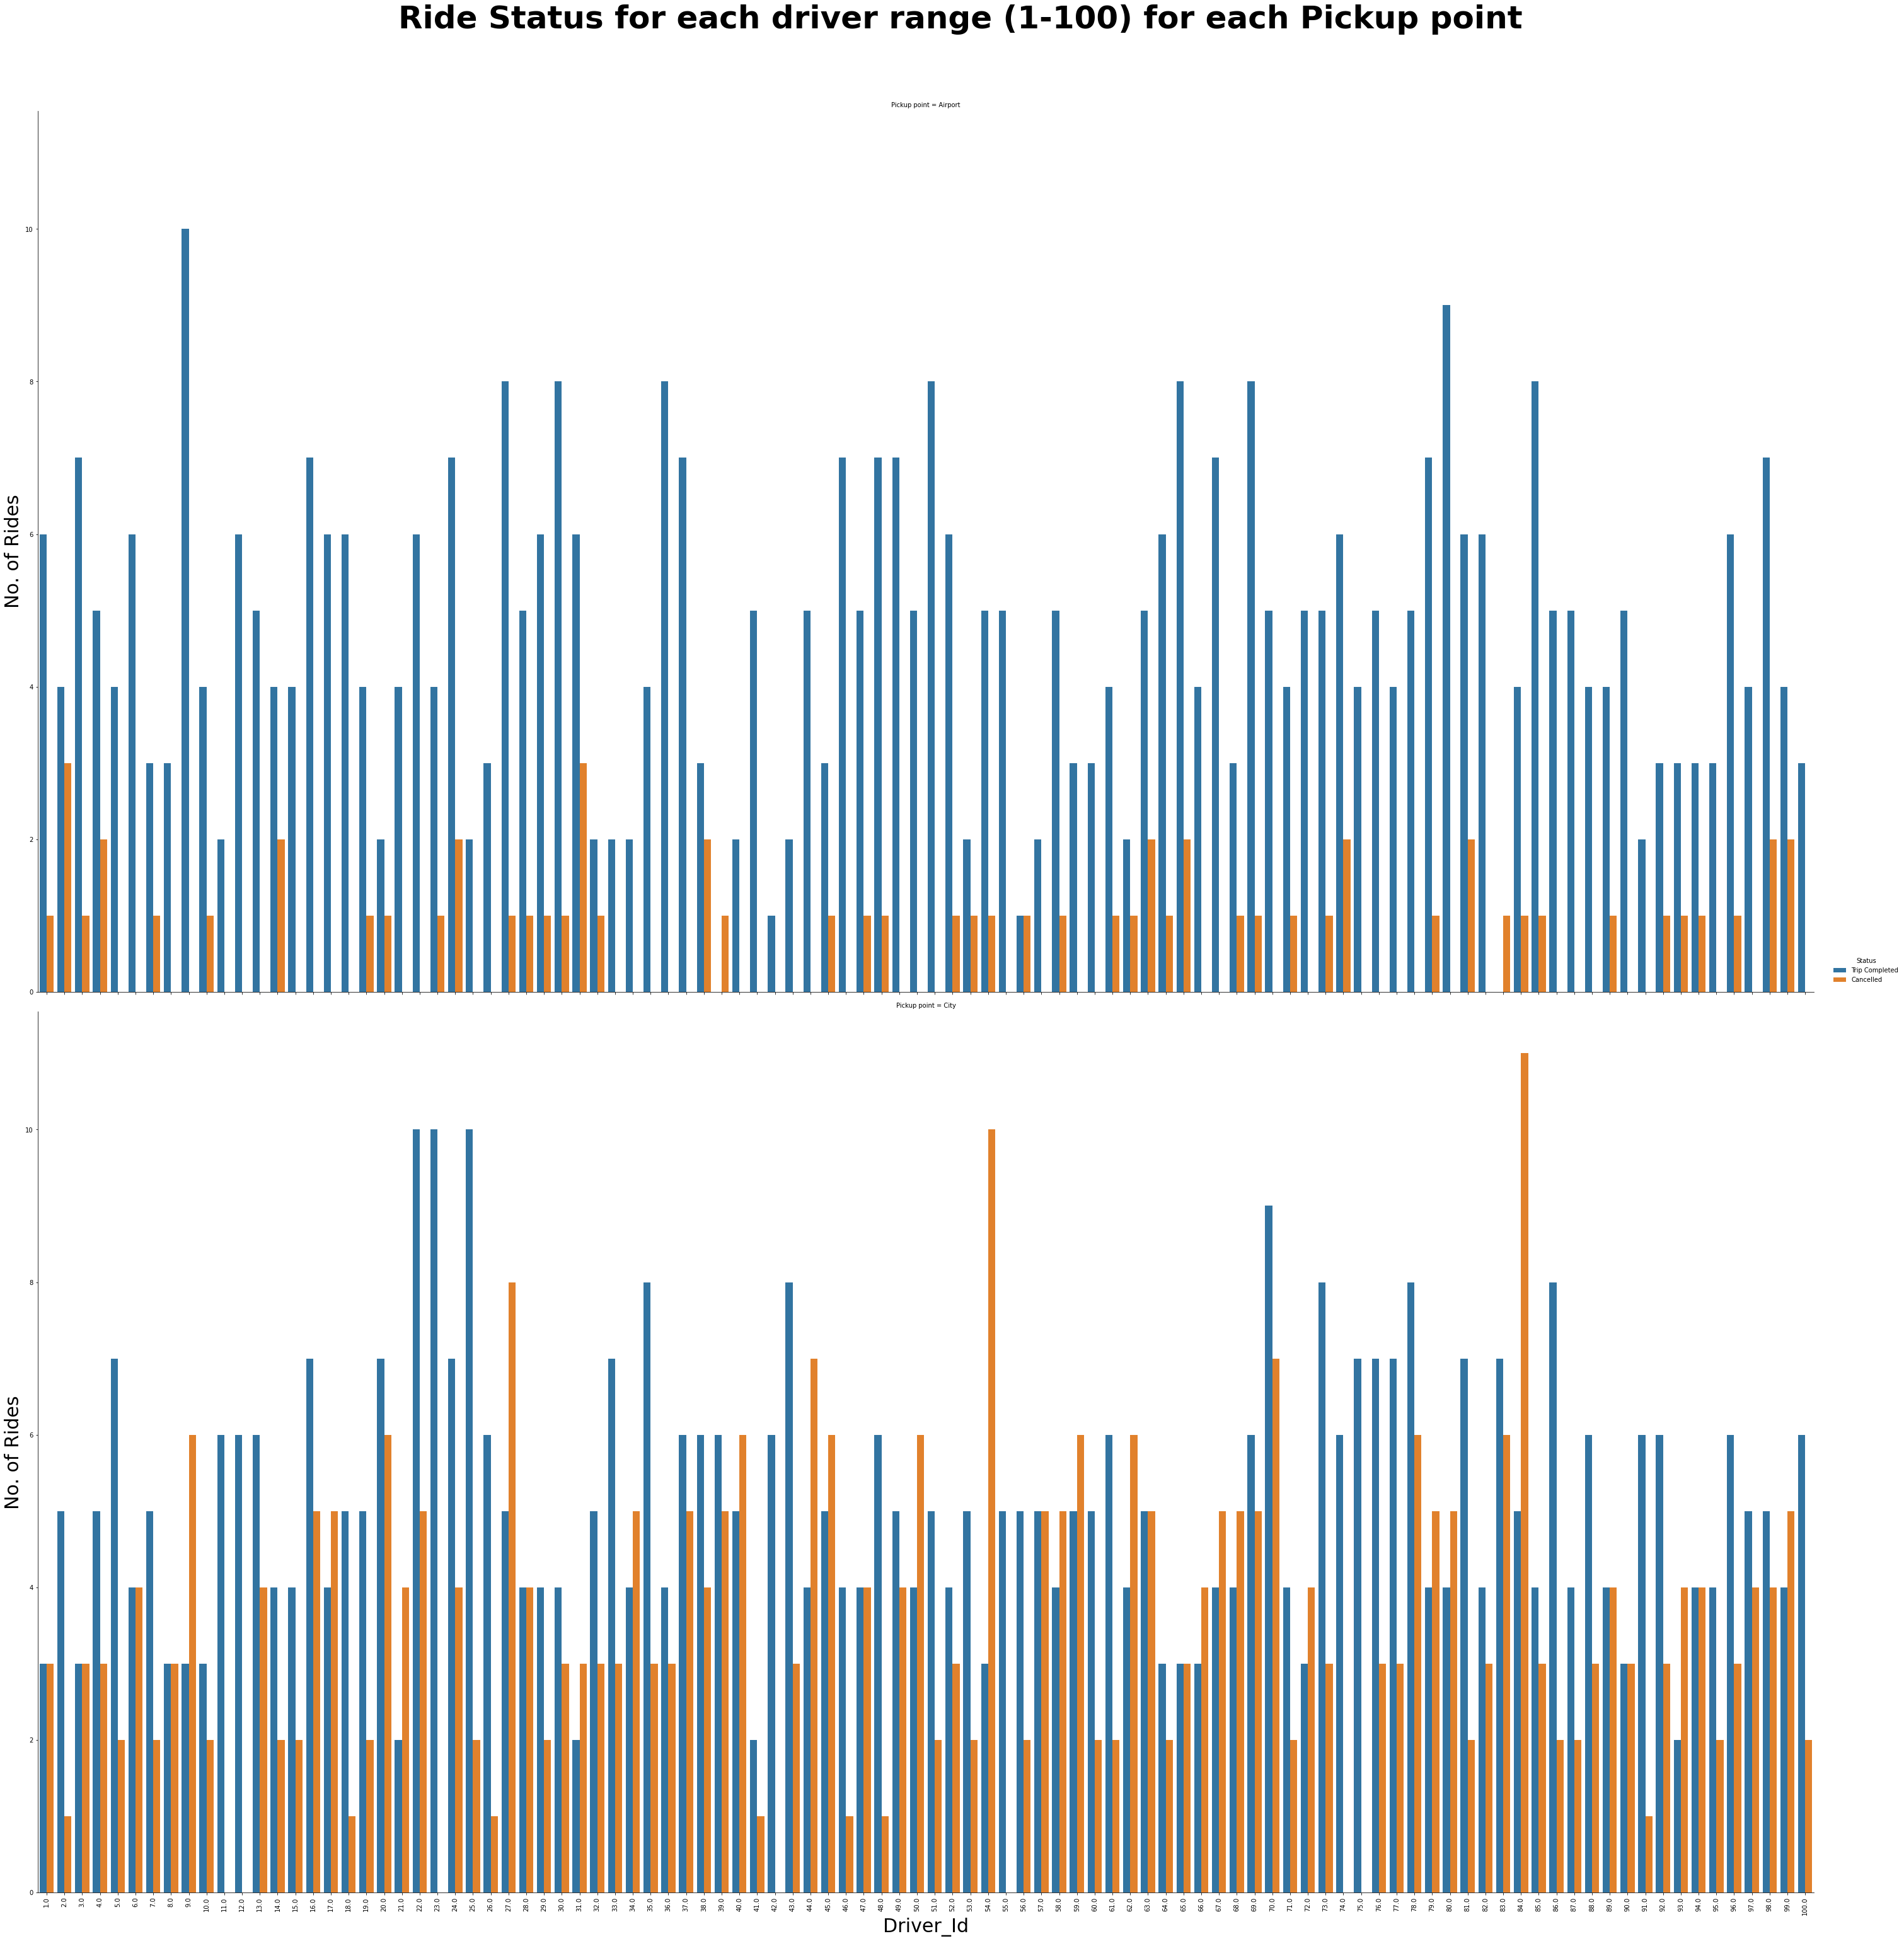

In [445]:
g=sns.catplot(x='Driver id', hue='Status', data=x, kind='count', row='Pickup point', height=20, aspect =2)
plt.tick_params('x', rotation=90)
g.fig.suptitle('Ride Status for each driver range (1-100) for each Pickup point', y = 1.05, fontsize=50, weight='bold')
g.set_axis_labels('Driver_Id', 'No. of Rides', fontsize=30)
plt.show()

<Figure size 1440x1440 with 0 Axes>

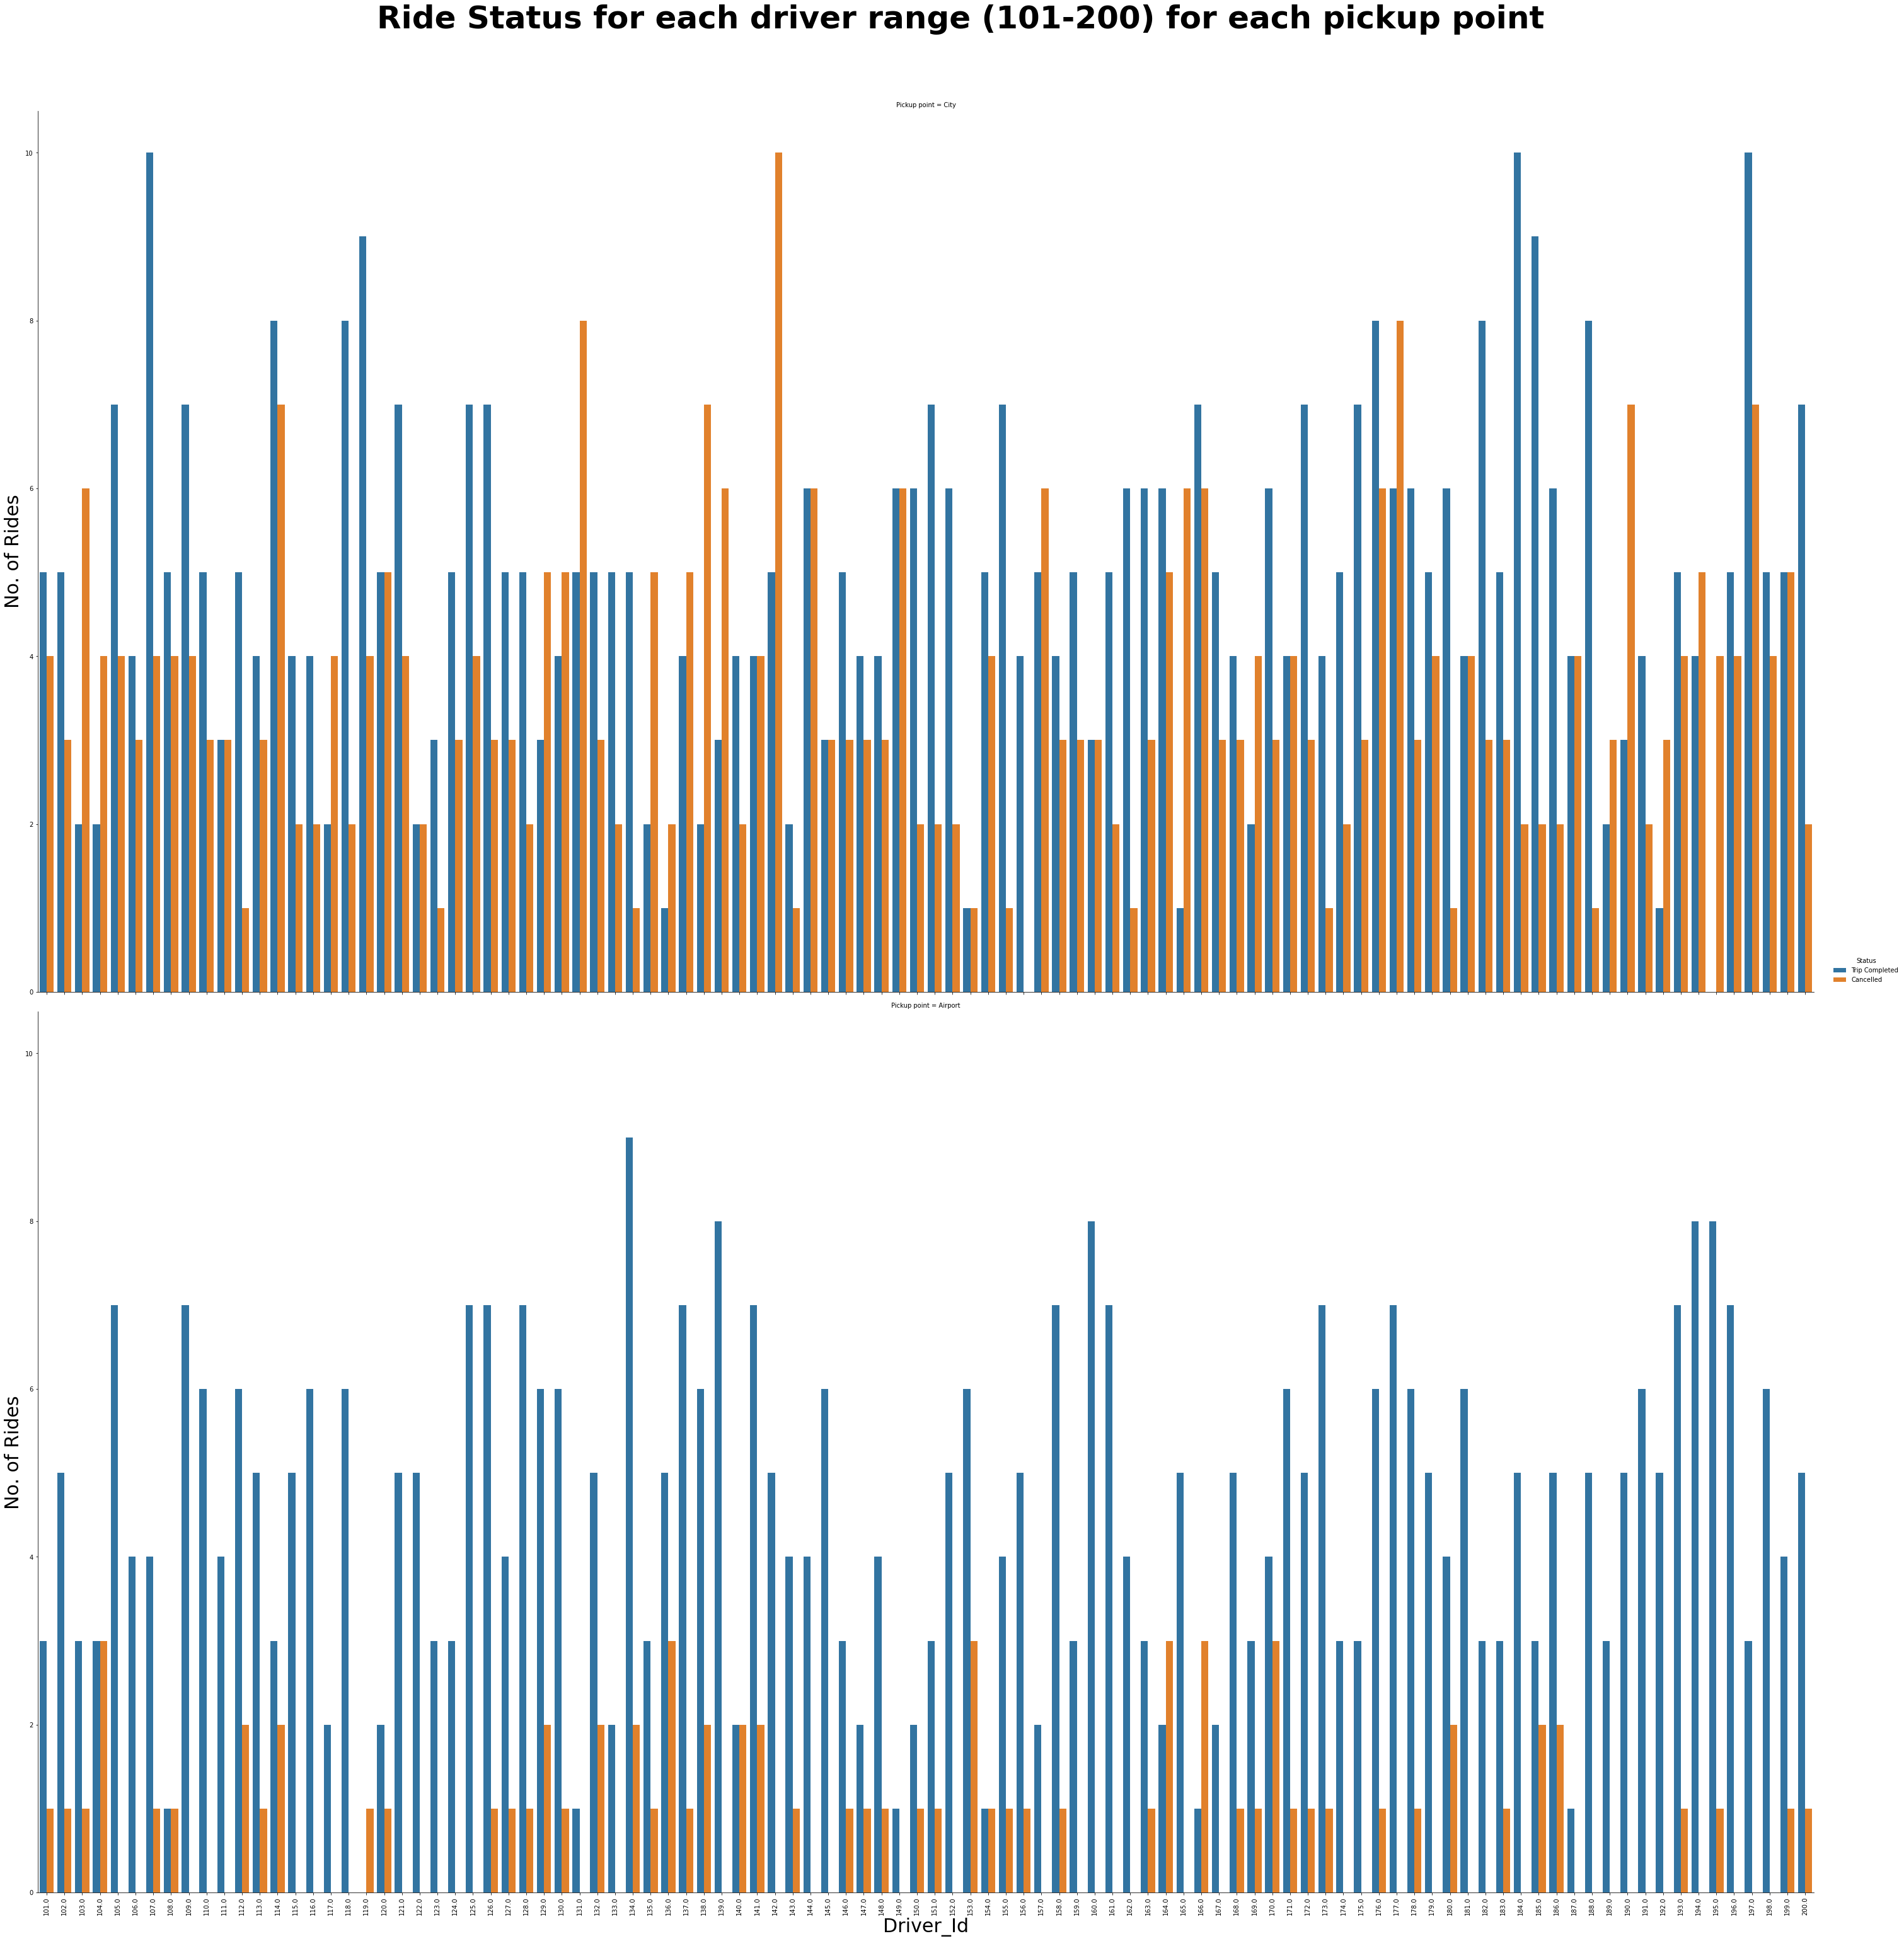

In [446]:
plt.figure(figsize=[20,20])
g=sns.catplot(x='Driver id', hue='Status', data=y, kind='count', row='Pickup point', height=20, aspect =2)
plt.tick_params('x', rotation=90)
g.fig.suptitle('Ride Status for each driver range (101-200) for each pickup point', y = 1.05, fontsize=50, weight='bold')
g.set_axis_labels('Driver_Id', 'No. of Rides', fontsize=30)
plt.show()

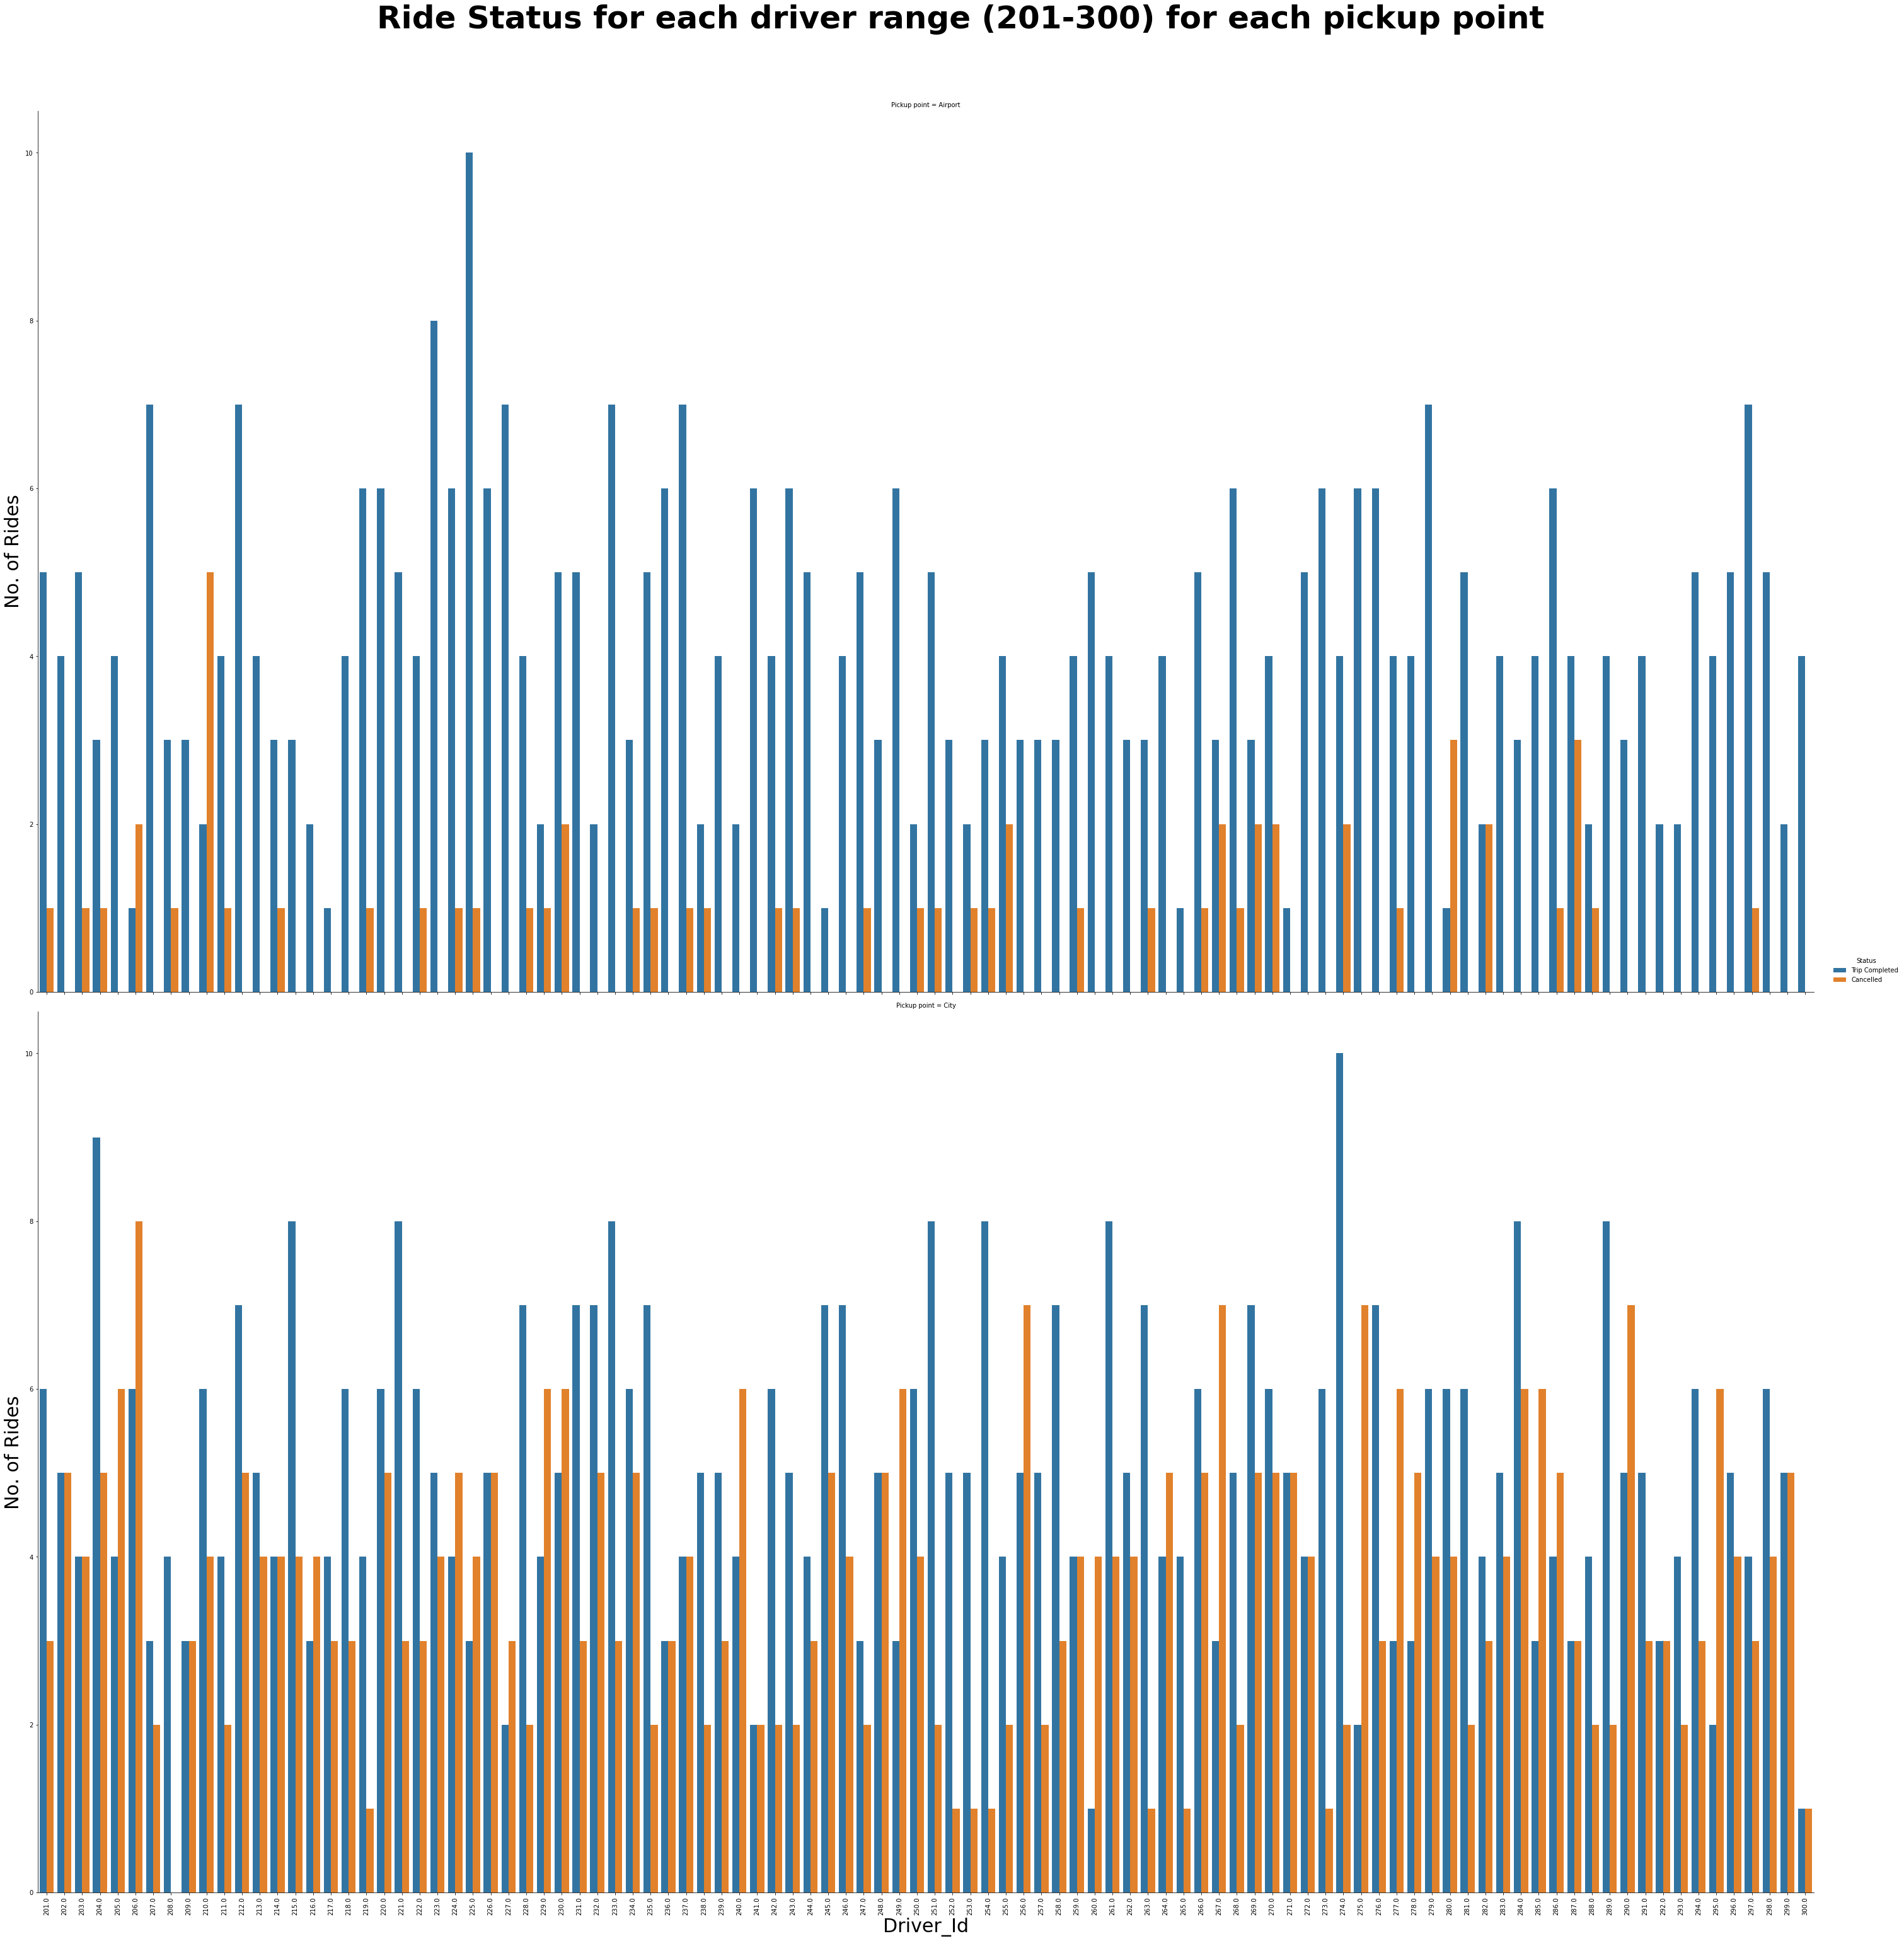

In [447]:
g=sns.catplot(x='Driver id', hue='Status', data=z, kind='count', row='Pickup point', height=20, aspect =2)
plt.tick_params('x', rotation=90)
g.fig.suptitle('Ride Status for each driver range (201-300) for each pickup point', y = 1.05, fontsize=50, weight='bold')
g.set_axis_labels('Driver_Id', 'No. of Rides', fontsize=30)
plt.show()

### Pie chart for Airport rides problem during night

In [413]:
airport_night=airport_data[np.logical_or(airport_data['Daytime']=='Evening', np.logical_or(airport_data['Daytime']=='Night', airport_data['Daytime']=='Late Night'))]['Status'].value_counts()

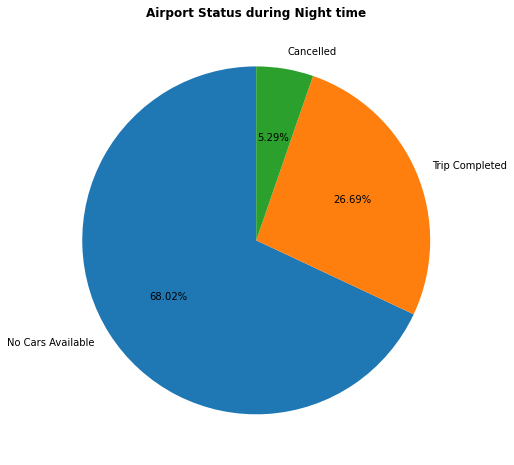

In [450]:
plt.figure(figsize=[10,8])
plt.pie(airport_night, labels=airport_night.index,autopct='%.2f%%', startangle=90)
plt.title('Airport Status during Night time', weight='bold')
plt.show()

### Pie Chart for city problem during morning

In [421]:
city_morning = city_data[np.logical_or(city_data['Daytime']=='Morning',city_data['Daytime']=='Early Morning')]['Status'].value_counts()

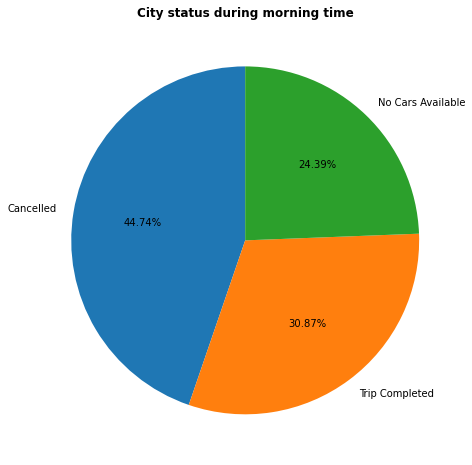

In [451]:
plt.figure(figsize=[10,8])
plt.pie(city_morning, labels=city_morning.index, startangle=90, autopct='%.2f%%')
plt.title('City status during morning time', weight='bold')
plt.show()

# Problem

- At airport, during night time we are not able to meet even 1/4th of demand majorily due to unavailability of cars.
- In city, during morning time we are not able to meet even 1/3th of demand majorily due to cancelled rides.
- We should focus on improving on these two factors to recover loss of business

# Solution

### 1. For Airport

- We need to encourage drivers to be available at airport during night time. We can reduce our share a lil to motivate them to be available.
- We can reward them if they complete certain no. of rides during this time.
- Since demand is high, we can charge customer more as the driver also need to pay some fees at airport as per my exp.

### 2. For city

- Airport have low demand during morning, so drivers might not be able to find a ride back. This can be the reason why drivers are cancelling rides. 
- Here also we can offer some rewards to complete airport rides during morning time.
- If driver is not able to find a ride back within a certain time, we should compensate for the fuel.
- We need to reduce our share during these peak time so we can atleast recover this loss revenue.